In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# df = pd.read_csv("https://info.dengue.mat.br/datasets/notificacao/20102023/weather_notification_SC_2010-01-01_2023-08-30.csv")

In [3]:
url = "/workspace/repos/cursos/ml-dengue-predict/fetchinfodenguedata/dataset/bkp/weather_notification_SC_2010-01-01_2023-08-30.csv"

df = pd.read_csv(url,index_col=[0]).reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522809 entries, 0 to 522808
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   uf              522809 non-null  object 
 1   geocodigo       522809 non-null  int64  
 2   nome_municipio  522809 non-null  object 
 3   dt_notific      522809 non-null  object 
 4   se_notif        522809 non-null  int64  
 5   ano_notif       522809 non-null  int64  
 6   temp_med        522809 non-null  float64
 7   precip_med      522809 non-null  float64
 8   pressao_med     522809 non-null  float64
 9   umid_med        522809 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 39.9+ MB


In [4]:
df.head()

,uf,geocodigo,nome_municipio,dt_notific,se_notif,ano_notif,temp_med,precip_med,pressao_med,umid_med
0,Santa Catarina,4209102,Joinville,2023-04-30,18,2023,20.466202,0.035414,1.005391,87.35066
1,Santa Catarina,4209102,Joinville,2023-04-30,18,2023,20.466202,0.035414,1.005391,87.35066
2,Santa Catarina,4209102,Joinville,2023-04-30,18,2023,20.466202,0.035414,1.005391,87.35066
3,Santa Catarina,4209102,Joinville,2023-04-30,18,2023,20.466202,0.035414,1.005391,87.35066
4,Santa Catarina,4209102,Joinville,2023-04-30,18,2023,20.466202,0.035414,1.005391,87.35066


In [5]:
list(df.columns)

['uf',
 'geocodigo',
 'nome_municipio',
 'dt_notific',
 'se_notif',
 'ano_notif',
 'temp_med',
 'precip_med',
 'pressao_med',
 'umid_med']

In [35]:
cols = ['uf', 'geocodigo', 'nome_municipio', 'dt_notific', 'se_notif', 'ano_notif', 'precip_med', 'pressao_med', 'temp_med', 'umid_med']


df_combined = df[cols] \
    .groupby(['uf', 'nome_municipio', 'se_notif', 'ano_notif', 'geocodigo']) \
    .agg(casos_notif=('dt_notific', 'count'),
         precip_med=('precip_med', 'mean'),
         pressao_med=('pressao_med', 'mean'),
         temp_med=('temp_med', 'mean'),
         umid_med=('umid_med', 'mean')).reset_index() \
    .sort_values(['ano_notif', 'se_notif'], ascending=[False, False])

df_combined


,uf,nome_municipio,se_notif,ano_notif,geocodigo,casos_notif,precip_med,pressao_med,temp_med,umid_med
334,Santa Catarina,Apiúna,33,2023,4201257,1,0.118710,0.996674,19.904106,82.034000
483,Santa Catarina,Araquari,33,2023,4201307,10,0.018671,1.006139,19.094256,87.402260
852,Santa Catarina,Balneário Barra do Sul,33,2023,4202057,4,0.018211,1.008367,18.981406,91.471262
1235,Santa Catarina,Balneário Camboriú,33,2023,4202008,10,0.011527,1.009745,16.144434,80.873799
1583,Santa Catarina,Balneário Piçarras,33,2023,4212809,3,0.024269,1.010688,14.223744,79.497622
...,...,...,...,...,...,...,...,...,...,...
6390,Santa Catarina,Florianópolis,1,2010,4205407,2,0.241621,0.995598,25.724470,84.835140
9255,Santa Catarina,Itajaí,1,2010,4208203,1,0.019671,1.001360,25.072872,82.722810
11177,Santa Catarina,Joinville,1,2010,4209102,2,0.156569,0.996337,25.964615,85.863235
11787,Santa Catarina,Lages,1,2010,4209300,1,0.454575,1.002228,20.545506,93.905365


In [34]:
# Análise Exploratória dos Dados

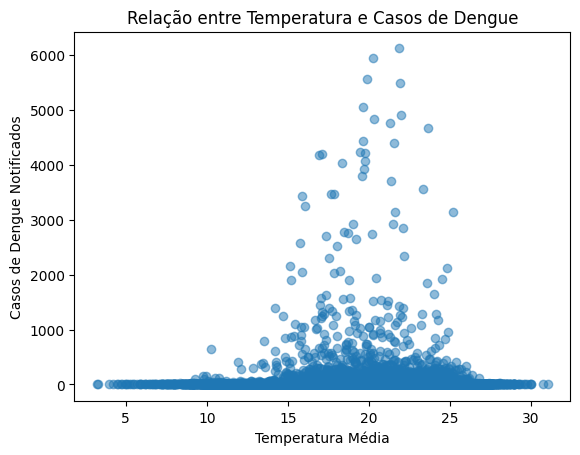

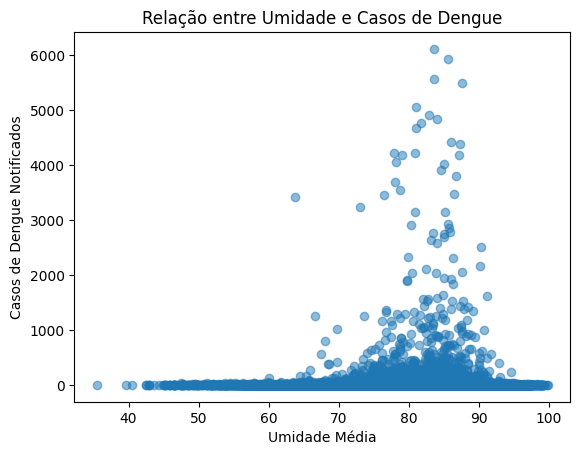

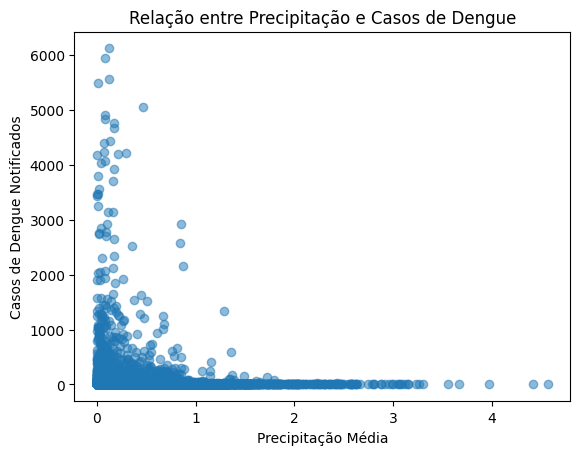

In [18]:
# Análise exploratória dos dados
plt.scatter(df_combined['temp_med'], df_combined['casos_notif'], alpha=0.5)
plt.xlabel('Temperatura Média')
plt.ylabel('Casos de Dengue Notificados')
plt.title('Relação entre Temperatura e Casos de Dengue')
plt.show()

plt.scatter(df_combined['umid_med'], df_combined['casos_notif'], alpha=0.5)
plt.xlabel('Umidade Média')
plt.ylabel('Casos de Dengue Notificados')
plt.title('Relação entre Umidade e Casos de Dengue')
plt.show()

plt.scatter(df_combined['precip_med'], df_combined['casos_notif'], alpha=0.5)
plt.xlabel('Precipitação Média')
plt.ylabel('Casos de Dengue Notificados')
plt.title('Relação entre Precipitação e Casos de Dengue')
plt.show()


/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


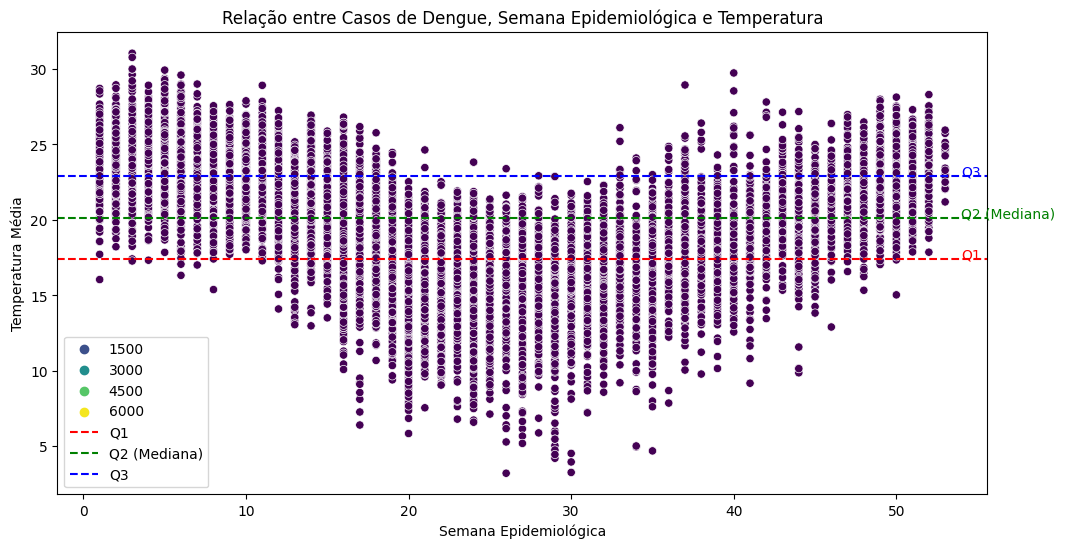

In [10]:
# Criar uma figura
plt.figure(figsize=(12, 6))

# Gráfico de dispersão de casos de dengue e temperatura
sns.scatterplot(data=df_combined, x='se_notif', y='temp_med', hue='casos_notif', palette='viridis')

# Calcular os quartis da temperatura
Q1 = df_combined['temp_med'].quantile(0.25)
Q3 = df_combined['temp_med'].quantile(0.75)

# Desenhar linhas verticais para dividir os dados em quartis
plt.axhline(Q1, color='r', linestyle='--', label='Q1')
plt.axhline((Q1 + Q3) / 2, color='g', linestyle='--', label='Q2 (Mediana)')
plt.axhline(Q3, color='b', linestyle='--', label='Q3')

# Configurar os rótulos dos quartis
plt.text(df_combined['se_notif'].max() + 1, Q1, 'Q1', color='r')
plt.text(df_combined['se_notif'].max() + 1, (Q1 + Q3) / 2, 'Q2 (Mediana)', color='g')
plt.text(df_combined['se_notif'].max() + 1, Q3, 'Q3', color='b')

plt.xlabel('Semana Epidemiológica')
plt.ylabel('Temperatura Média')
plt.title('Relação entre Casos de Dengue, Semana Epidemiológica e Temperatura')
plt.legend()
plt.show()


In [9]:
# Relação entre os casos de dengue e as variáveis climáticas.

/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


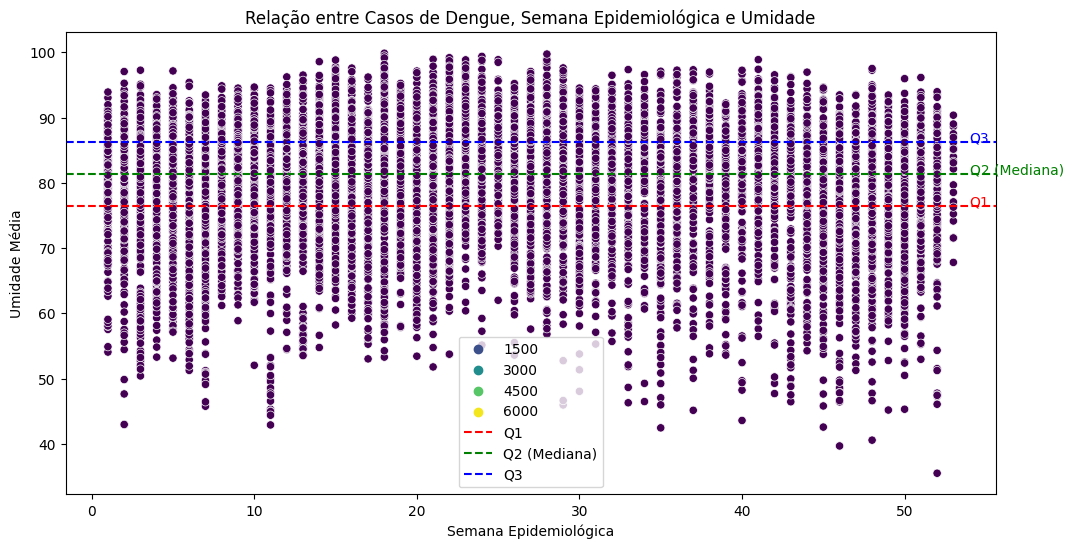

In [27]:
# Criar uma figura
plt.figure(figsize=(12, 6))

# Gráfico de dispersão de casos de dengue e temperatura
sns.scatterplot(data=df_combined, x='se_notif', y='umid_med', hue='casos_notif', palette='viridis')

# Calcular os quartis da temperatura
Q1 = df_combined['umid_med'].quantile(0.25)
Q3 = df_combined['umid_med'].quantile(0.75)

# Desenhar linhas verticais para dividir os dados em quartis
plt.axhline(Q1, color='r', linestyle='--', label='Q1')
plt.axhline((Q1 + Q3) / 2, color='g', linestyle='--', label='Q2 (Mediana)')
plt.axhline(Q3, color='b', linestyle='--', label='Q3')

# Configurar os rótulos dos quartis
plt.text(df_combined['se_notif'].max() + 1, Q1, 'Q1', color='r')
plt.text(df_combined['se_notif'].max() + 1, (Q1 + Q3) / 2, 'Q2 (Mediana)', color='g')
plt.text(df_combined['se_notif'].max() + 1, Q3, 'Q3', color='b')

plt.xlabel('Semana Epidemiológica')
plt.ylabel('Umidade Média')
plt.title('Relação entre Casos de Dengue, Semana Epidemiológica e Umidade')
plt.legend()
plt.show()


In [28]:
X = df_combined[['temp_med', 'umid_med', 'se_notif', 'ano_notif', 'geocodigo']]
y = df_combined['casos_notif']


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.ensemble import RandomForestRegressor

# Criar uma instância do modelo com os hiperparâmetros desejados
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo com os dados de treinamento
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

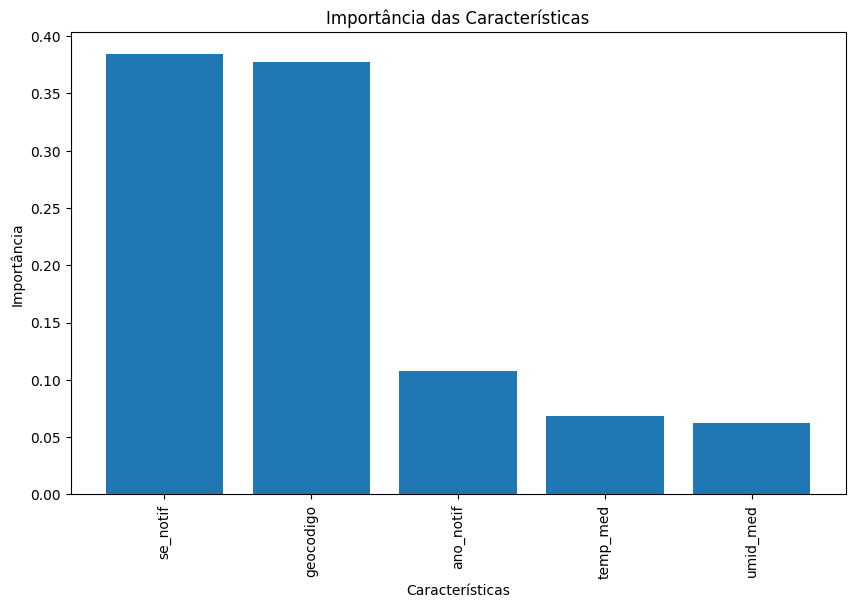

In [31]:
# Obter a importância das características do modelo
feature_importances = rf_model.feature_importances_

# Obter as colunas de características
feature_names = X_train.columns

# Classificar as características por importância
indices = feature_importances.argsort()[::-1]

# Plotar a importância das características
plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Características")
plt.ylabel("Importância")
plt.show()


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_model.predict(X_test)

# Calcule o RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcule o R-squared
r_squared = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R-squared: {r_squared}')


RMSE: 65.2691993262952
R-squared: 0.9012074286370864
